In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content'


In [ ]:
import pandas as pd
!kaggle datasets download -d srinivas1/agricuture-crops-production-in-india

agricuture-crops-production-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)




```
# This is formatted as code
```

# FARMER CROP YIELD PREDICTOR


In [ ]:
!unzip \*.zip

Archive:  agricuture-crops-production-in-india.zip
  inflating: datafile (1).csv        
  inflating: datafile (2).csv        
  inflating: datafile (3).csv        
  inflating: datafile.csv            
  inflating: produce.csv             


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as py
import os

In [ ]:
d1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cropreccomendation/datafile (1).csv')
d2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cropreccomendation/datafile (2).csv')
d3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cropreccomendation/datafile (3).csv')
d4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cropreccomendation/datafile.csv')
d1.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [ ]:



column_mapping = {
    'Crop': 'Crop',
    'State': 'State',
    'Cost of Cultivation (`/Hectare) A2+FL': 'Cost_A2_FL',
    'Cost of Cultivation (`/Hectare) C2': 'Cost_C2',
    'Cost of Production (`/Quintal) C2': 'Cost_Production',
    'Yield (Quintal/ Hectare) ': 'Yield'
}


d1.rename(columns=column_mapping, inplace=True)


styled_d1 = d1.head().style.set_properties(
    **{'background-color': 'lightblue', 'color': 'black', 'border-color': '#8b8c8c'}
)

styled_d1


,Crop,State,Cost_A2_FL,Cost_C2,Cost_Production,Yield
0,ARHAR,Uttar Pradesh,9794.050000,23076.740000,1941.550000,9.830000
1,ARHAR,Karnataka,10593.150000,16528.680000,2172.460000,7.470000
2,ARHAR,Gujarat,13468.820000,19551.900000,1898.300000,9.590000
3,ARHAR,Andhra Pradesh,17051.660000,24171.650000,3670.540000,6.420000
4,ARHAR,Maharashtra,17130.550000,25270.260000,2775.800000,8.720000


In [ ]:
print(f' The dataset contains {d1.shape[1]} columns and {d1.shape[0]} rows')

print(d1.columns)

 The dataset contains 6 columns and 49 rows
Index(['Crop', 'State', 'Cost_A2_FL', 'Cost_C2', 'Cost_Production', 'Yield'], dtype='object')


In [ ]:
d1.info()
d1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             49 non-null     object 
 1   State            49 non-null     object 
 2   Cost_A2_FL       49 non-null     float64
 3   Cost_C2          49 non-null     float64
 4   Cost_Production  49 non-null     float64
 5   Yield            49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


,Cost_A2_FL,Cost_C2,Cost_Production,Yield
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


In [ ]:
d1.isnull().sum().sum()

0

In [ ]:
d1.isna().sum()/len(d1)*100


Crop               0.0
State              0.0
Cost_A2_FL         0.0
Cost_C2            0.0
Cost_Production    0.0
Yield              0.0
dtype: float64

In [ ]:
d1.fillna(0, inplace=True)

In [ ]:
print('The duplicate values in the data is', d1.duplicated().sum())

The duplicate values in the data is 0


In [ ]:
avg_yield = d1.groupby('Yield')[['Cost_A2_FL', 'Cost_C2', 'Cost_Production']].mean()


avg_yield.head(10).style.background_gradient(cmap='Pastel1')

,Cost_A2_FL,Cost_C2,Cost_Production
Yield,,,
1.320000,6440.640000,7868.640000,5777.480000
3.010000,5483.540000,8266.980000,2614.140000
4.050000,6204.230000,9165.590000,2068.670000
4.710000,13647.100000,17314.200000,3484.010000
5.900000,6684.180000,13209.320000,2228.970000
6.420000,17051.660000,24171.650000,3670.540000
6.700000,10780.760000,15371.450000,2261.240000
6.830000,8552.690000,12610.850000,1691.660000
7.470000,10593.150000,16528.680000,2172.460000


In [ ]:
d2_pd=d2
d2_pd.rename(columns={'Crop             ':'Crop'},inplace=True)
print(d2.columns)

Index(['Crop', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')


In [ ]:
d3.isna().sum()

Crop                         0
Variety                      0
Season/ duration in days    28
Recommended Zone             1
Unnamed: 4                  78
dtype: int64

In [ ]:
d3['Crop'].unique()

array(['Paddy', 'Wheat', 'Barley', 'Maize', 'Pearl Millet',
       'Finger Millet', 'Indian Mustard', 'Yellow Sarson', 'Linseed',
       'Groundnut', 'Sesame', 'Chickpea ', 'Bengal Gram', 'Lentil',
       'Fieldpea', 'French Bean', 'Mungbean', 'Urdbean', 'Cluster Bean',
       'Horse Gram', 'Sugarcane', 'Napier Bajra Hybrid', 'Oat',
       'Tall Fescue Grass', 'Cowpea (Fodder)', 'Jute', 'Mesta', 'Cotton',
       'Desi Cotton'], dtype=object)

In [ ]:
d3.drop('Unnamed: 4',axis=1,inplace=True)
d3.dropna(inplace=True)
d3.info()
d3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 75
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Crop                      50 non-null     object
 1   Variety                   50 non-null     object
 2   Season/ duration in days  50 non-null     object
 3   Recommended Zone          50 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


,Crop,Variety,Season/ duration in days,Recommended Zone
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a..."
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ..."
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr..."
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra..."
5,Paddy,CR Dhan 601 (IET 18558),160,"Boro Area of Orissa, West Bengal and Assam."


In [ ]:
d3.fillna(0).head()

,Crop,Variety,Season/ duration in days,Recommended Zone
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a..."
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ..."
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr..."
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra..."
5,Paddy,CR Dhan 601 (IET 18558),160,"Boro Area of Orissa, West Bengal and Assam."


In [ ]:
d4.head()
d4.isna().sum()/len(d4)*100

Crop       7.692308
2004-05    7.692308
2005-06    7.692308
2006-07    7.692308
2007-08    7.692308
2008-09    7.692308
2009-10    7.692308
2010-11    7.692308
2011-12    7.692308
dtype: float64

In [ ]:
mean_of_columns = d4.loc[:, '2004-05':'2011-12'].mean()


In [ ]:
d4.dropna(subset=['Crop'],axis=0,inplace =True)

In [ ]:
d4.isna().sum()

Crop       0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
dtype: int64

In [ ]:
def state1(row):
    if 'Andhra Pradesh' in row['Recommended Zone']:
        return 1
def state2(row):
    if 'Tamil Nadu' in row['Recommended Zone']:
        return 1
def state3(row):
    if 'Gujarat' in row['Recommended Zone']:
        return 1
def state4(row):
    if 'Orissa' in row['Recommended Zone']:
        return 1
def state5(row):
    if 'Punjab' in row['Recommended Zone']:
        return 1
def state6(row):
    if 'Haryana' in row['Recommended Zone']:
        return 1
def state7(row):
    if 'Uttar Pradesh' in row['Recommended Zone']:
        return 1
def state8(row):
    if 'Rajasthan' in row['Recommended Zone']:
        return 1
def state9(row):
    if 'Karnataka' in row['Recommended Zone']:
        return 1
def state10(row):
    if 'Madhya Pradesh' in row['Recommended Zone']:
        return 1
def state11(row):
    if 'West Bengal' in row['Recommended Zone']:
        return 1

In [ ]:
d3['Andhra Pradesh'] = d3.apply(state1,axis=1)
d3['Tamil Nadu']=d3.apply(state2,axis=1)
d3['Gujarat']=d3.apply(state3,axis=1)
d3['Orissa']=d3.apply(state4,axis=1)
d3['Punjab']=d3.apply(state5,axis=1)
d3['Haryana']=d3.apply(state6,axis=1)
d3['Uttar Pradesh']=d3.apply(state7,axis=1)
d3['Rajasthan']=d3.apply(state8,axis=1)
d3['Karnataka']=d3.apply(state9,axis=1)
d3['Madhya Pradesh']=d3.apply(state10,axis=1)
d3['West Bangal']=d3.apply(state11,axis=1)

In [ ]:
plt.figure(figsize=(12,6))
k=px.sunburst(d1,path=['State','Crop'],values='Yield',
              hover_data=['Yield'], color_continuous_scale='Blues')
k.update_layout(title='Best Yield Capacity Crop')
k.show()

<Figure size 1200x600 with 0 Axes>

In [ ]:
import plotly.graph_objects as go
import pandas as pd


crops = d4['Crop'].unique()


crops_to_display = crops[:6]


traces = []
for crop in crops_to_display:
    trace = go.Scatter(
        x=d4.columns[1:],
        y=d4.loc[d4['Crop'] == crop, d4.columns[1:]].values.flatten(),
        mode='lines+markers',
        name=crop,
    )
    traces.append(trace)


layout = go.Layout(
    title='Crop Growth Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Percentage'),
)


fig = go.Figure(data=traces, layout=layout)


fig.show()

<ipython-input-24-311448ac3ffd>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 1.0, 'Cost of Cultivation vs. Cost of Production by Crop')

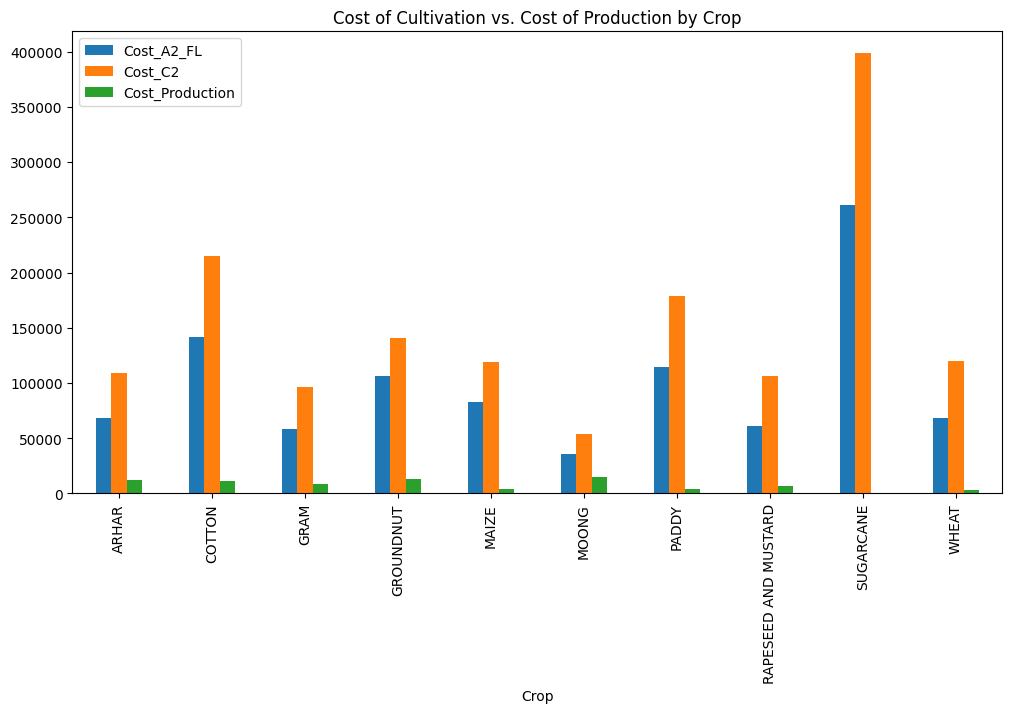

In [ ]:
cols = d1.columns
d1.groupby('Crop')[cols[:-1]].sum().plot(kind='bar', figsize=(12,6)),
plt.title('Cost of Cultivation vs. Cost of Production by Crop')

<ipython-input-25-7a8d2c55dca8>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='Duration'>

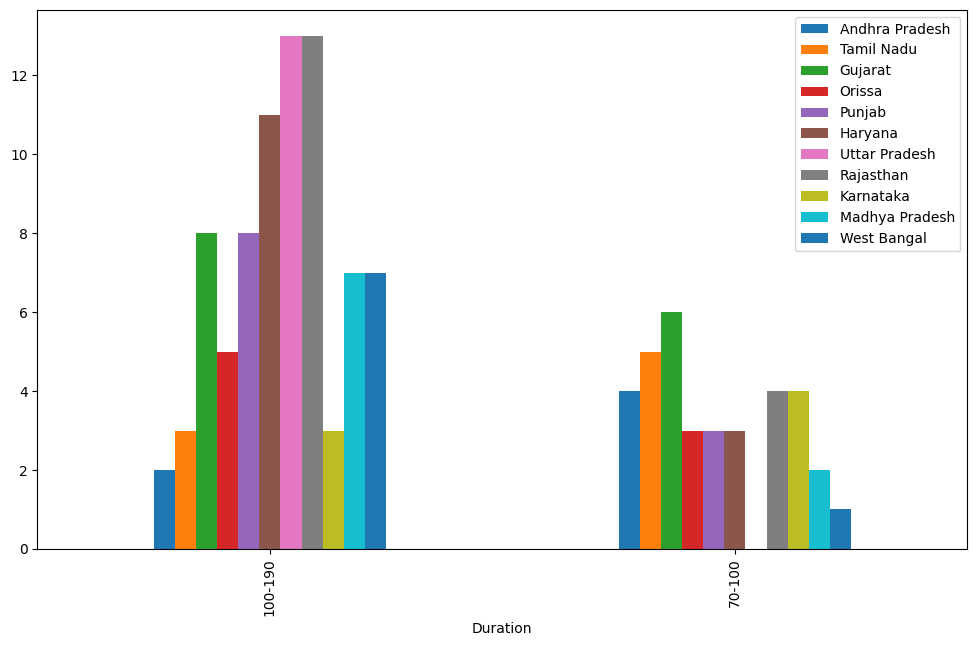

In [ ]:
df = d3.groupby('Crop').sum(),
df = pd.DataFrame(d3.groupby('Season/ duration in days').count().reset_index())
df1 = pd.DataFrame([df.loc[1:27].sum(),df.loc[29:37].sum()])
df1.drop('Season/ duration in days',axis=1,inplace=True)
df1 = df1.assign(Duration = ['100-190','70-100'])
df1[['Andhra Pradesh', 'Tamil Nadu',
       'Gujarat', 'Orissa', 'Punjab', 'Haryana', 'Uttar Pradesh', 'Rajasthan',
       'Karnataka', 'Madhya Pradesh', 'West Bangal', 'Duration']].plot(x = 'Duration',kind='bar',figsize=(12,7))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
X = d1[['Cost_A2_FL', 'Cost_C2', 'Cost_Production']]  # Features
y = d1['Yield']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 28230.05404690463


In [ ]:
new_data = pd.DataFrame({'Cost_A2_FL': [1500], 'Cost_C2': [2000], 'Cost_Production': [2500]})
new_data_scaled = scaler.transform(new_data)
predicted_yield = model.predict(new_data_scaled)
print(f'Predicted Yield: {predicted_yield[0]}')

Predicted Yield: -229.03103880694795


Mean Squared Error: 99.14482000000004
R-squared: 0.9989025077630996


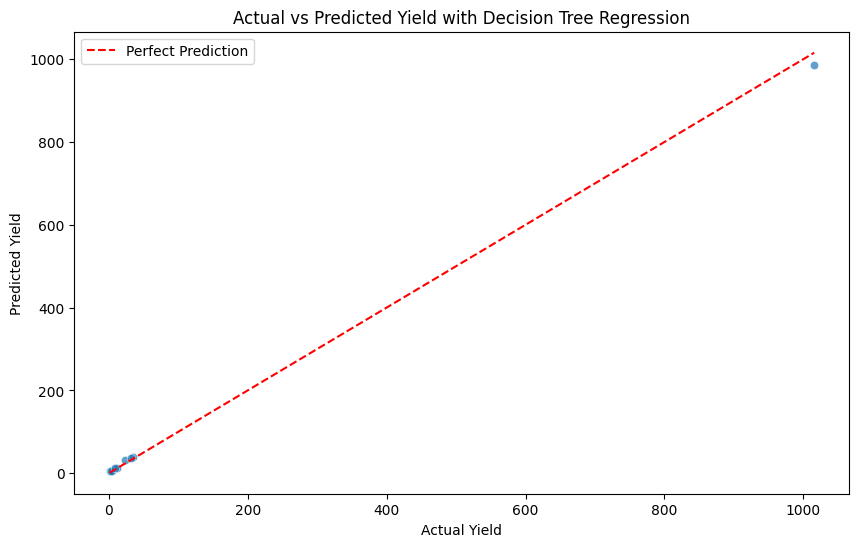

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded and preprocessed your dataset into 'X' and 'y'
# For example, X could be your features, and y could be the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield with Decision Tree Regression')
plt.legend()
plt.show()


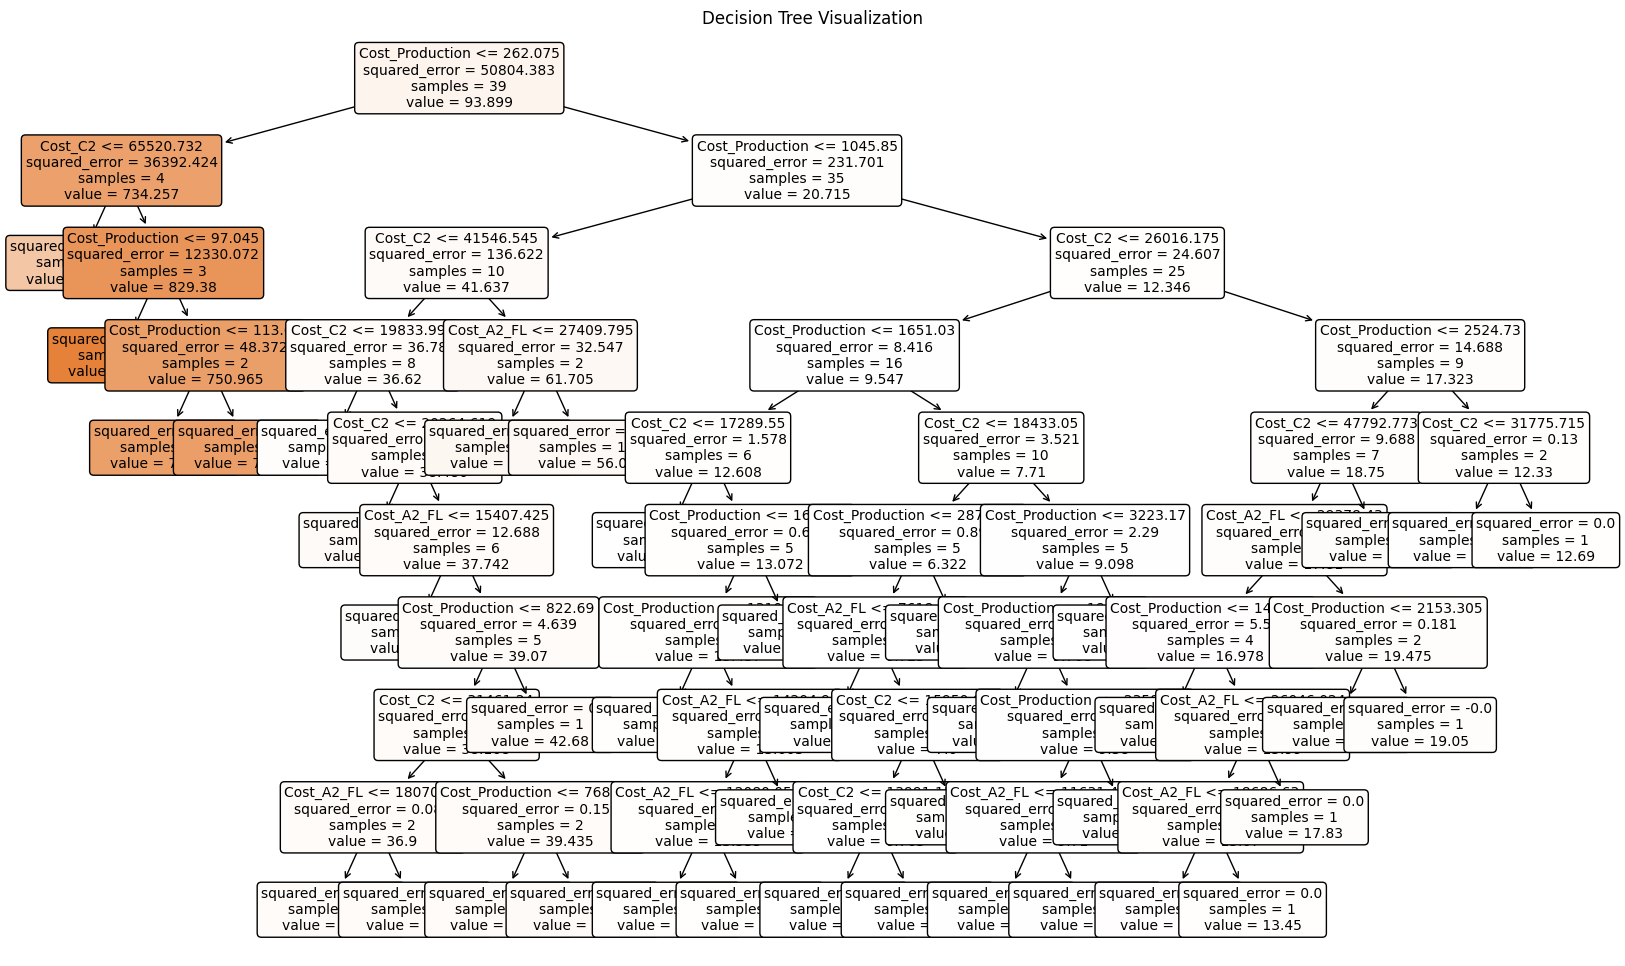

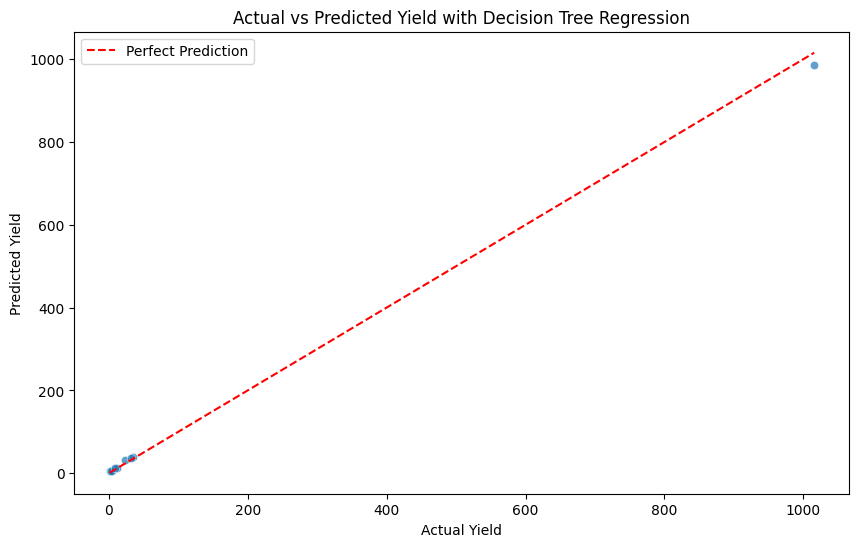

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded and preprocessed your dataset into 'X' and 'y'
# For example, X could be your features, and y could be the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(20, 12))
plot_tree(dt_regressor, feature_names=X.columns, filled=True, fontsize=10, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield with Decision Tree Regression')
plt.legend()
plt.show()


Mean Squared Error: 28230.054046904657
R-squared: 0.6875049532214041
Coefficients: [ 0.00241273  0.00752019 -0.04914749]
Intercept: -124.8217905419569


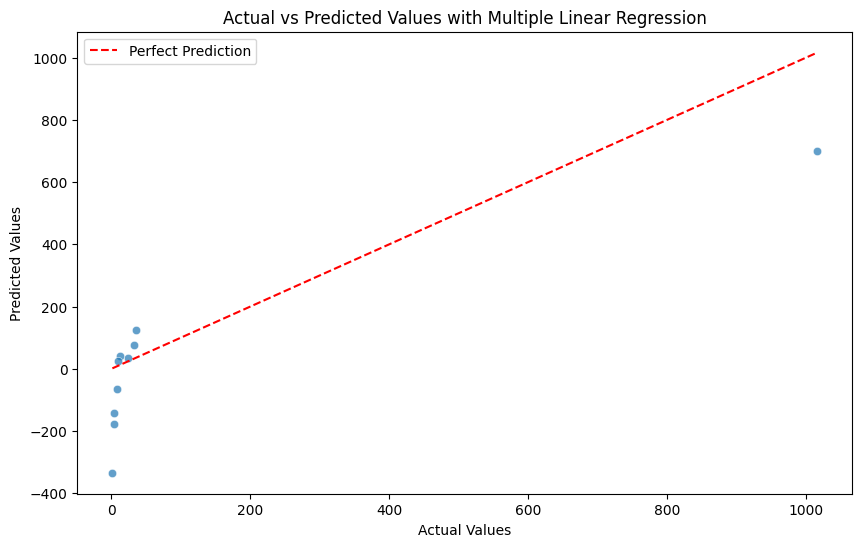

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded and preprocessed your dataset into 'X' and 'y'
# For example, X could be your features, and y could be the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print the coefficients and intercept
print('Coefficients:', linear_regressor.coef_)
print('Intercept:', linear_regressor.intercept_)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Multiple Linear Regression')
plt.legend()
plt.show()
